# Exploring airplane crashes


Acording to [WikiHow](https://www.wikihow.com/Survive-a-Plane-Crash)
> The odds of dying on a commercial airline flight are actually as low as 9 million to 1. That said, a lot can go wrong at 33,000 feet (10,058.4 m) above the ground, and if you’re unlucky enough to be aboard when something does, the decisions you make could mean the difference between life and death. Almost 95% of airplane crashes have survivors, so even if the worst does happen, your odds aren't as bad as you might think.

So let's see...

## Setting up the environment

In [38]:
#importing the libraries and data
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
%matplotlib inline
Data = pd.read_csv('aircrash1908-2008.csv')

## Getting familiar with data

In [39]:
Data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,09/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,07/12/1912 06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,08/06/1913 00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,09/09/1913 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [40]:
obs,feat=Data.shape

In [41]:
obs,feat

(5268, 13)

In [42]:
print(str("Dataset consist of " + str(obs) + " observations (crashes) and " + str(feat) + " features. Features are following:"))

Dataset consist of 5268 observations (crashes) and 13 features. Features are following:


In [43]:
Data.tail()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
5263,05/20/2009,05/20/2009 06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,05/26/2009 00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,06/01/2009 00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,06/07/2009 08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...
5267,06/08/2009,06/08/2009 00:00,"State of Arunachal Pradesh, India",Military - Indian Air Force,NaN,Mechuka for Jorhat,Antonov An-32,NaN,NaN,13.0,13.0,0.0,The military transport went missing while en r...


*  **Date** (date the crash had taken place)
* **Time** (time the crash had taken place)
* **Location** 
* **Operator **
* **Flight #** 
* **Route**
* **Type**
* **Registration**
* **cn/In ** - ?
* **Aboard **  - number of people aboard
* **Fatalities ** - lethal outcome
* **Ground** - saved people
* **Summary ** - brief summary of the case

And actually something does not make sense in this data set. Theoretically, Aboard = Fatalities + Ground, but it does not look like this. So I just skipped Ground row for any further analysis.
Now let's look how data looks like and check how many missing values are here.

In [44]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
Date            5268 non-null object
Time            5268 non-null object
Location        5248 non-null object
Operator        5250 non-null object
Flight #        1069 non-null object
Route           3562 non-null object
Type            5241 non-null object
Registration    4933 non-null object
cn/In           4040 non-null object
Aboard          5246 non-null float64
Fatalities      5256 non-null float64
Ground          5246 non-null float64
Summary         4878 non-null object
dtypes: float64(3), object(10)
memory usage: 535.1+ KB


In [45]:
Data.isnull().sum() #calculating missing values in rows

Date               0
Time               0
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Nice to see, that there are not so many missing values of variables we are most interested in (Date, Operator, Aboard, Fatalities, ...). 
Let's move futher and do some manipulations with data.

## Data manipulation

I want to create a new row with 'Date + Time' format. I replaced all the missing values of Time with 0:00. Then I removed some wrong symbols and fixed broken values. 

In [46]:
Data['Time'].replace(np.nan, '00:00') 

0       09/17/1908 17:18
1       07/12/1912 06:30
2       08/06/1913 00:00
3       09/09/1913 18:30
4       10/17/1913 10:30
5       03/05/1915 01:00
6       09/03/1915 15:20
7       07/28/1916 00:00
8       09/24/1916 01:00
9       10/01/1916 23:45
10      11/21/1916 00:00
11      11/28/1916 23:45
12      03/04/1917 00:00
13      03/30/1917 00:00
14      05/14/1917 05:15
15      06/14/1917 08:45
16      08/21/1917 07:00
17      10/20/1917 07:45
18      04/07/1918 21:30
19      05/10/1918 00:00
20      08/11/1918 10:00
21      12/16/1918 00:00
22      05/25/1919 00:00
23      07/19/1919 00:00
24      10/02/1919 00:00
25      10/14/1919 00:00
26      10/20/1919 00:00
27      10/30/1919 00:00
28      03/10/1920 00:00
29      03/30/1920 00:00
              ...       
5238    11/13/2008 11:35
5239    11/16/2008 10:32
5240    11/27/2008 17:00
5241    12/03/2008 12:13
5242    12/11/2008 06:25
5243    12/15/2008 16:40
5244    01/04/2009 15:30
5245    01/15/2009 15:06
5246    02/07/2009 14:00


In [47]:
Data['Date']

0       09/17/1908
1       07/12/1912
2       08/06/1913
3       09/09/1913
4       10/17/1913
5       03/05/1915
6       09/03/1915
7       07/28/1916
8       09/24/1916
9       10/01/1916
10      11/21/1916
11      11/28/1916
12      03/04/1917
13      03/30/1917
14      05/14/1917
15      06/14/1917
16      08/21/1917
17      10/20/1917
18      04/07/1918
19      05/10/1918
20      08/11/1918
21      12/16/1918
22      05/25/1919
23      07/19/1919
24      10/02/1919
25      10/14/1919
26      10/20/1919
27      10/30/1919
28      03/10/1920
29      03/30/1920
           ...    
5238    11/13/2008
5239    11/16/2008
5240    11/27/2008
5241    12/03/2008
5242    12/11/2008
5243    12/15/2008
5244    01/04/2009
5245    01/15/2009
5246    02/07/2009
5247    02/07/2009
5248    02/12/2009
5249    02/15/2009
5250    02/20/2009
5251    02/25/2009
5252    03/09/2009
5253    03/12/2009
5254    03/22/2009
5255    03/23/2009
5256    04/01/2009
5257    04/06/2009
5258    04/09/2009
5259    04/1

In [48]:
#cleaning up

def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) #convert to date type
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper() #just to avoid duplicates like 'British Airlines' and 'BRITISH Airlines'

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


After this manipulations we have a new Time column with *%m/%d/%Y %H:%M* format. We can see that almost 10 year of recent information is missing so we will not see the actual trend.

## Data Visualization
### Total accidents

In [49]:
accser=Data.groupby(Data.Time.dt.year)[['Date']].count()
accser.head()
accser[accser.index==1972]

,Date
Time,
1972,104


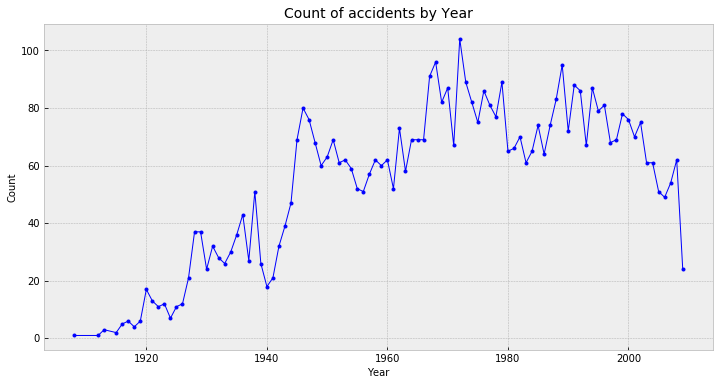

In [50]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='blue', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)
plt.show()

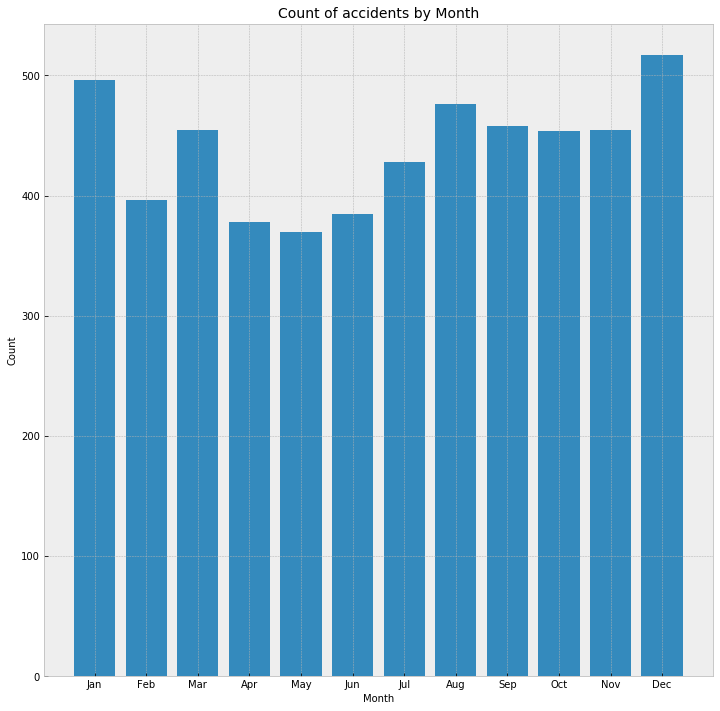

In [52]:
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


plt.figure(figsize=(12,12))

plt.bar(Data.groupby(Data.Time.dt.month)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.month)[['Date']].count())
plt.xticks(Data.groupby(Data.Time.dt.month)[['Date']].count().index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Month', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.title('Count of accidents by Month', loc='Center', fontsize=14)
plt.show()


Text(0.5,1,'Count of accidents by Day of Week')

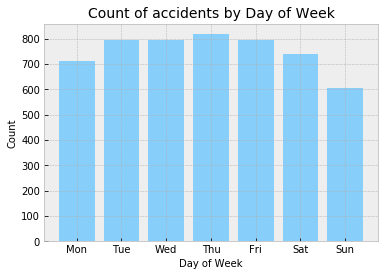

In [53]:
ax = pl.plot()
plt.bar(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, 'Date', data=Data.groupby(Data.Time.dt.weekday)[['Date']].count(), color='lightskyblue', linewidth=2)
plt.xticks(Data.groupby(Data.Time.dt.weekday)[['Date']].count().index, ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of Week', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Day of Week', loc='Center', fontsize=14)

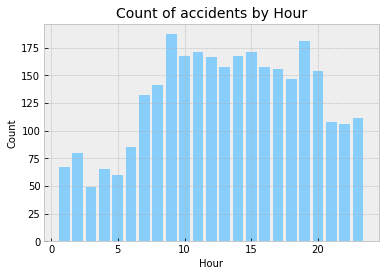

In [54]:
ax = pl.plot()
plt.bar(Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count().index, 'Date', data=Data[Data.Time.dt.hour != 0].groupby(Data.Time.dt.hour)[['Date']].count(),color ='lightskyblue', linewidth=2)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Hour', loc='Center', fontsize=14)

plt.show()

### Military vs Passenger flights

In [55]:
Temp = Data.copy()

Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')

Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']

Text(0.5,1,'Total number of accidents by Type of flight')

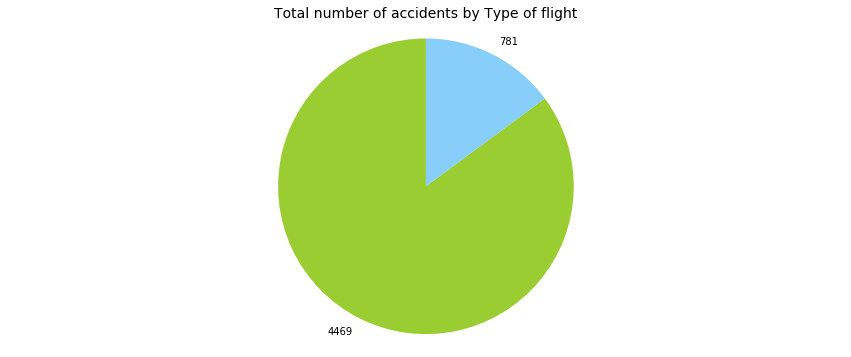

In [56]:
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))

plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)

plt.axis('equal')
plt.title('Total number of accidents by Type of flight', loc='Center', fontsize=14)

In [57]:

Temp2 = Data.copy()

Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')

Temp2['Passenger'] = Temp2.Military == False

Temp2 = Temp2.loc[:, ['Time', 'Military', 'Passenger']]

Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)



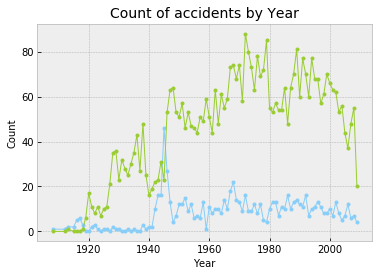

In [58]:
plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker = ".", linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker = ".", linewidth=1)

plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Count of accidents by Year', loc='Center', fontsize=14)

plt.show()

In [60]:
Fatalities.head(2)

NameError: name 'Fatalities' is not defined

### Total number of Fatalities

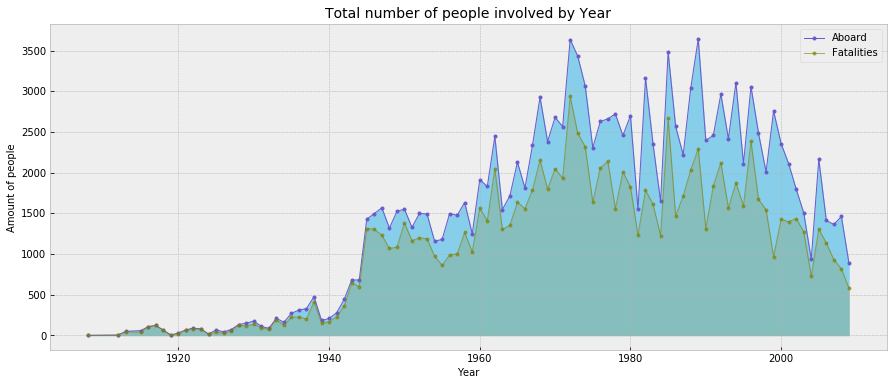

In [61]:
Fatalities = Data.groupby(Data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']

plt.figure(figsize=(15,6))

plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color="skyblue")
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker = ".", color="Slateblue", linewidth=1)
plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color="olive", marker = ".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Total number of people involved by Year', loc='Center', fontsize=14)
plt.show()

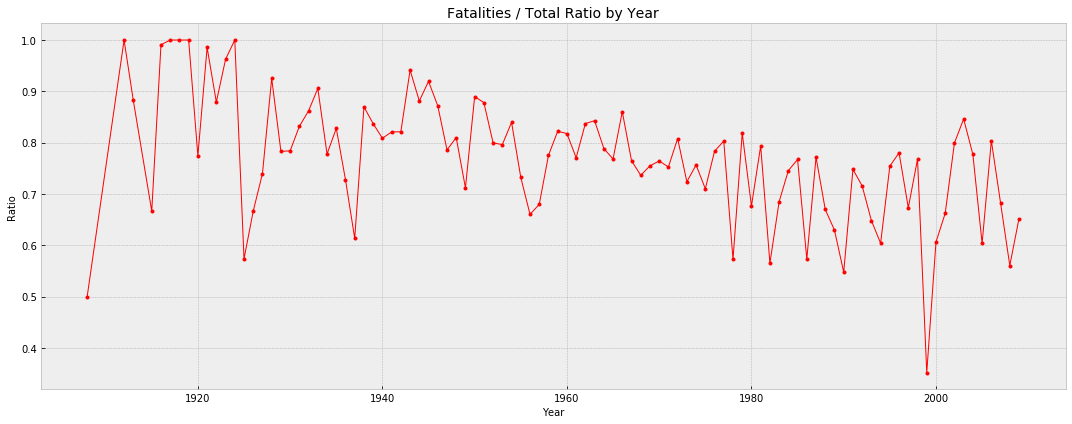

In [62]:
#Fatalities
plt.figure(figsize=(15,6))
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker = ".", color = 'red', linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Ratio', fontsize=10)
plt.title('Fatalities / Total Ratio by Year', loc='Center', fontsize=14)
plt.tight_layout()
plt.show()

### Problems with misleading data
So previous plots may look scary - number of fatalities became so high (even so it's seems to trend to decrease after 90s). Guys on [reddit](https://www.reddit.com/r/dataisbeautiful/comments/86cba3/visualizing_airplane_crashes_19082009/) made a good point about the fact that graphs don't show the proportion of accidents by all flights by year. So 1970-1990 look like scary years in the history of airf lights with rise of deaths, but there might be also the rise of total amount of people flyong by air while actually proportion became lower.

I was googling the database of total number of flights or passengers and so far I could find just this dataset from [worldbank.org](https://data.worldbank.org/indicator/IS.AIR.DPRT?end=2016&start=1970&view=chart). So I have uploaded a .csv dataset from that site and let's see what we've got.

In [63]:
Totals = pd.read_csv('API_IS.AIR.DPRT_DS2_en_csv_v2_9948080.csv')
Totals.sample(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
139,Lesotho,LSO,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Kosovo,XKX,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Armenia,ARM,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,7632.0,8761.0,5561.0,6043.0,852.0,0.0,0.0,NaN,NaN,NaN
249,United States,USA,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,9182363.0,10095197.0,10057768.0,9864360.0,9745498.0,9556324.0,9496469.0,9631764.000,NaN,NaN
67,Eritrea,ERI,"Air transport, registered carrier departures w...",IS.AIR.DPRT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,539.0,713.636,NaN,NaN


In [64]:
Totals.shape

(264, 63)

### Data Cleaning and Manipulation

In [65]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [66]:
Fatalities = Fatalities.reset_index()
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals, Fatalities], axis=1) #joining two data frames into one
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100 #calculating ratio

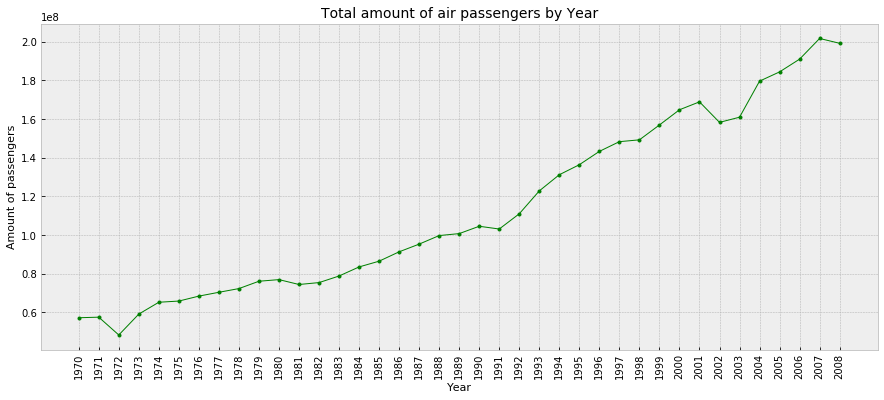

In [67]:
plt.figure(figsize=(15,6))
plt.plot(Totals.index, 'Sum', data=Totals, marker = ".", color = 'green', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Amount of passengers', fontsize=11)
plt.title('Total amount of air passengers by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)
plt.show()

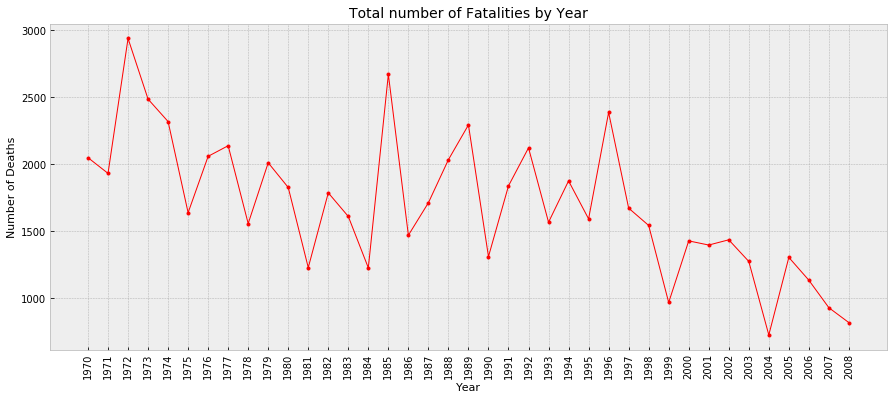

In [68]:
plt.figure(figsize=(15,6))
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Number of Deaths', fontsize=11)
plt.title('Total number of Fatalities by Year', loc='Center', fontsize=14)
plt.xticks(rotation=90)
plt.show()

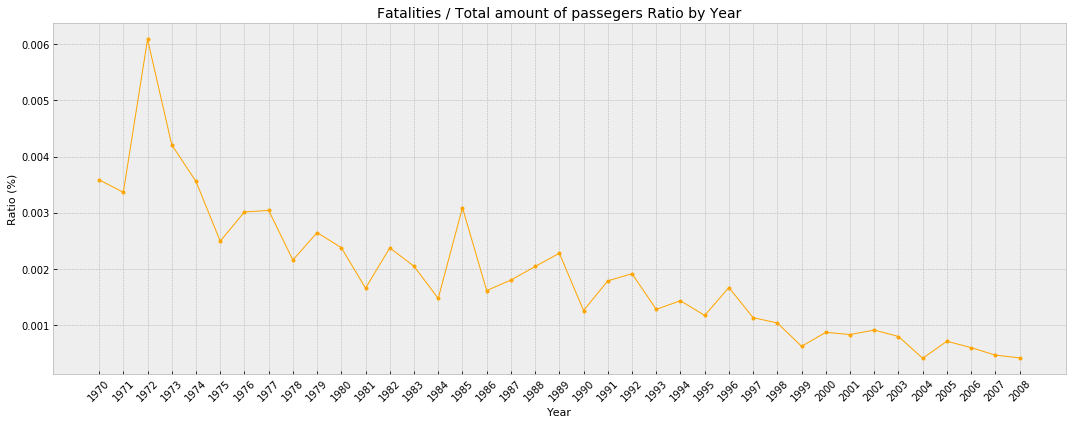

In [69]:
plt.figure(figsize=(15,6))
plt.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Ratio (%)', fontsize=11)
plt.title('Fatalities / Total amount of passegers Ratio by Year', loc='Center', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this plot we can see that trend actually goes down which was maybe not so obvious from plot with amount of deaths only. 
Let's put line with ratio and number of deaths on one plot.

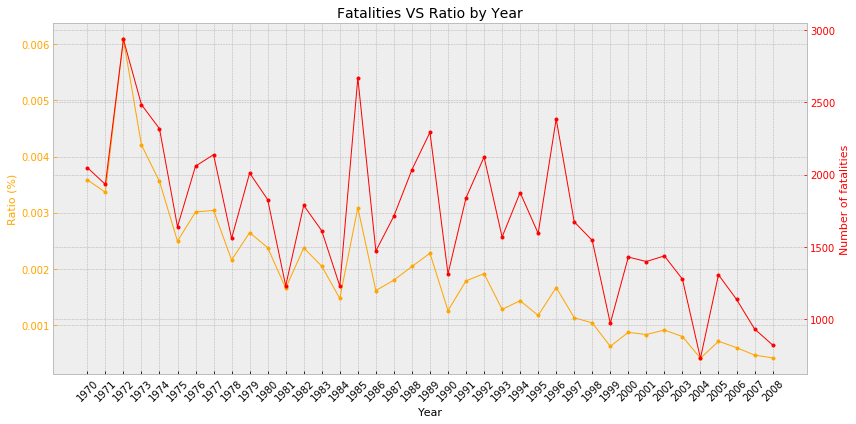

In [70]:
fig =plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='orange', marker = ".", linewidth=1)
ax1.set_xlabel('Year', fontsize=11)
for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
ax1.set_ylabel('Ratio (%)', color='orange', fontsize=11)
ax1.tick_params('y', colors='orange')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker = ".", linewidth=1)
ax2.set_ylabel('Number of fatalities', color='red', fontsize=11)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by Year', loc='Center', fontsize=14)
fig.tight_layout()
plt.show()

We can see that peaks like 1985, 1989, 1992, 1996 look scary, while ratio actually trends down. Of course there are some questions thats are wanted to be asked, like "is it full database of airplane accidents?" or "does total number of passenger include military flights or just passenger?" so this plot is that an estimation.

### Operators Analysis

In [71]:
Data.Operator = Data.Operator.str.upper()
Data.Operator = Data.Operator.replace('A B AEROTRANSPORT', 'AB AEROTRANSPORT')

Total_by_Op = Data.groupby('Operator')[['Operator']].count()
#Total_by_Op
Total_by_Op = Total_by_Op.rename(columns={"Operator": "Count"})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)



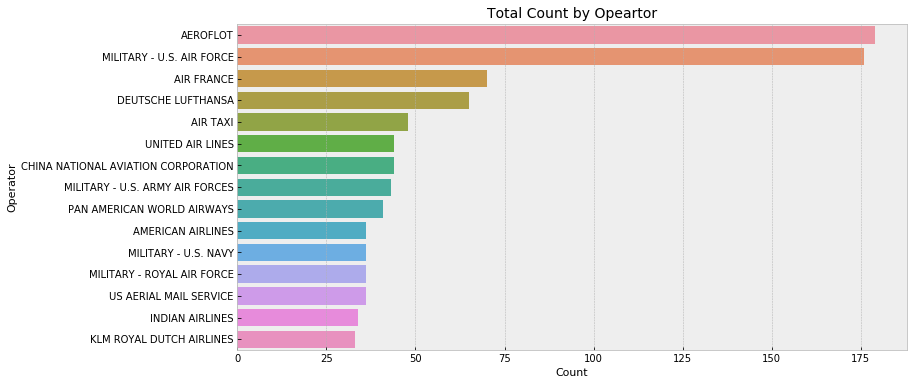

In [72]:
plt.figure(figsize=(12,6))
sns.barplot(y=Total_by_Op.index, x="Count", data=Total_by_Op)
plt.xlabel('Count', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Count by Opeartor', loc='Center', fontsize=14)
plt.show()

In [73]:
Prop_by_Op = Data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)


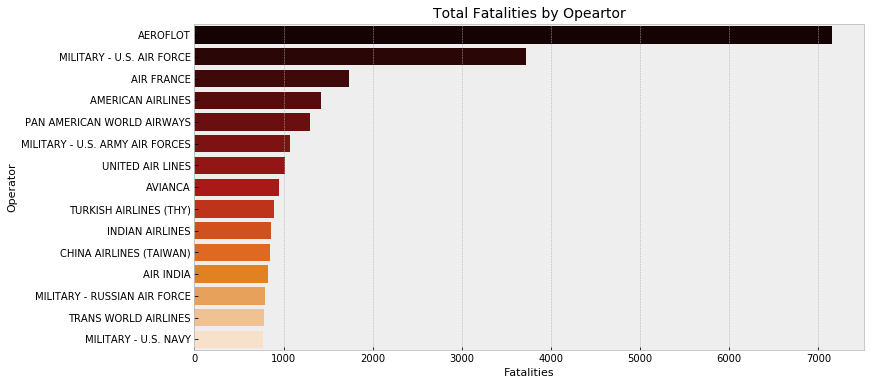

In [74]:

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_heat")
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Let's find out which Flight Operators actually have the least number of people involved:

In [75]:
#Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

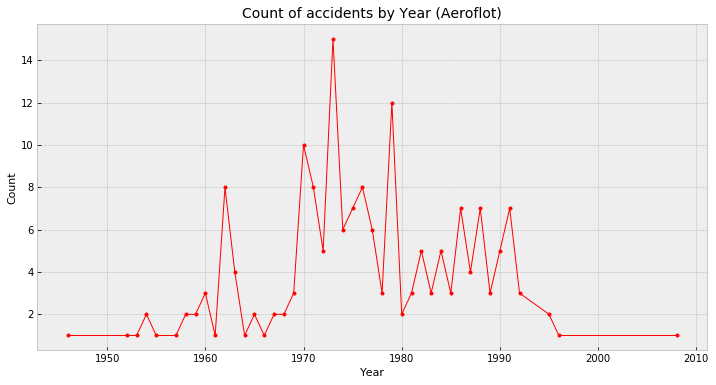

In [76]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

plt.figure(figsize=(12,6))
plt.plot(Count_by_Year.index, 'Count', data=Count_by_Year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by Year (Aeroflot)', loc='Center', fontsize=14)
plt.show()

It seems like 1970s were not the best year in history of Aeroflot. More about accidents in this years can be found on [Wikipedia page](https://en.wikipedia.org/wiki/Aeroflot_accidents_and_incidents_in_the_1970s)

### Conclusion

Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). However we can not make decisions about any Operator like "which airline is much safer to flight with" without knowledge of total amount flights. If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights. 

So this project taught me to think more critical about data and not to make decisions without including athe infotmation possible.

I hope you enjoyed it :)